In [108]:
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.integrate import odeint
from scipy.optimize import fsolve
sns.set();

The general formulation of Lambda-Omega systems is:

$\frac{dx}{dt} = \Lambda(r)x - \Omega(r)y$

$\frac{dy}{dt} = \Omega(r)x + \Lambda(r)y$

with $r^2 = x^2 + y^2$

which upon cartesian to polar coordinates change is converted to:

$x = r\cos(\theta)$

$y = r\sin(\theta)$

$\frac{dr}{dt} = r\Lambda(r)$

$\frac{d\theta}{dt} = \Omega(r)$

Under this formulation, $\Lambda(\vec r) = 0$ are the circular limit cycles.

## Numerical integration of the dynamic system

In [15]:
def df_dt(f0, t):
    r = f0[0]
    theta = f0[1]
    #dr/dt
    dr_dt = r*lambda_function(l, b, r)
    #dtheta/dt
    dtheta_dt = omega_function(o, a, r)
    
    return [dr_dt, dtheta_dt]

In [93]:
def lambda_function(l, b, r):
    return l - b*r*r

def omega_function(o, a, r):
    return o + a*r*r

In [105]:
# Parameters
l = 1
o = 1
a = 1
b = 1

#times to integrate
ts = np.linspace(0,10,1000)

#initial conditions
r_0 = 1
theta_0 = 0
f0 = [r_0, theta_0]

#Solve
sol = odeint(df_dt, f0, ts)

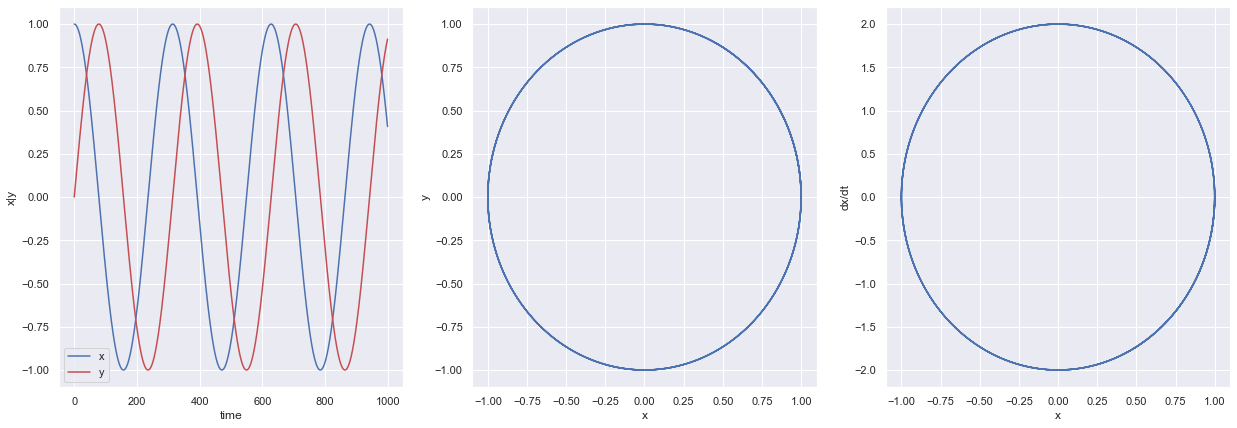

In [208]:
r = sol[:,0]
theta = sol[:,1]

fig= plt.figure(figsize=(21,7))

plt.subplot(1,3,1)
plt.plot(r*np.cos(theta),'b')
plt.plot(r*np.sin(theta),'r')
plt.legend(['x','y'])
plt.ylabel('x|y')
plt.xlabel('time');

plt.subplot(1,3,2)
plt.plot(r*np.cos(theta),r*np.sin(theta))
plt.ylabel('y')
plt.xlabel('x');

plt.subplot(1,3,3)
plt.plot(r*np.cos(theta),lambda_function(l, b, r)*r*np.cos(theta) - omega_function(o, a, r)*r*np.sin(theta))
plt.xlabel('x')
plt.ylabel('dx/dt');

## Calculation of the nullclines

The nullclines of the system are the values for $\frac{dx}{dt} = 0$ and $\frac{dy}{dt} = 0$

which for the system above are:

$ay^3 + bxy^2 + (\omega + ax^2)y - (\lambda - bx^2)x = 0$ (x-nullcline)

$ax^3 − bx^2y + (\omega + ay^2)x + (\lambda − by^2)y = 0$ (y-nullcline)

In [209]:
def x_nullcline(y):
        return a*y**3 + b*x_vals*y**2 + (o + a*x_vals**2)*y - (l - b*x_vals**2)*x_vals

def y_nullcline(x):
        return a*x**3 - b*x**2*y_vals + (o + a*y_vals**2)*x + (l - b*y_vals**2)*y_vals

In [210]:
x_null = []
y_null = []
for i in np.linspace(-2,2,200):
    x_vals = i
    y_vals = i
    x_null.append(fsolve(x_nullcline,0))
    y_null.append(fsolve(y_nullcline,0))

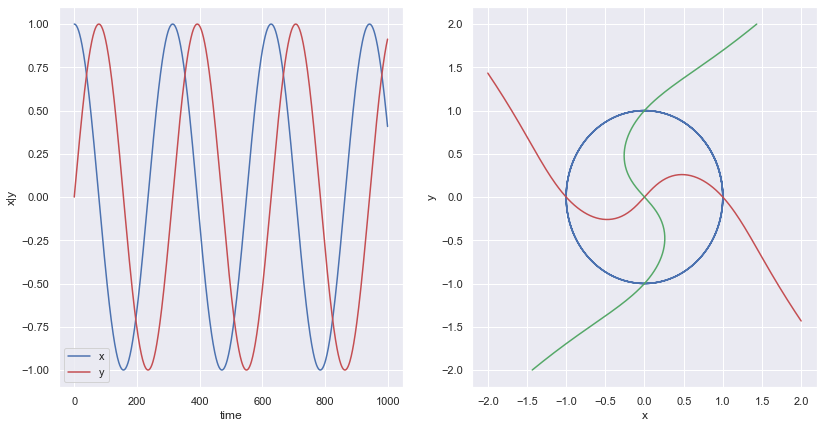

In [214]:
fig= plt.figure(figsize=(21,7))

plt.subplot(1,3,1)
plt.plot(r*np.cos(theta),'b')
plt.plot(r*np.sin(theta),'r')
plt.legend(['x','y'])
plt.ylabel('x|y')
plt.xlabel('time');

plt.subplot(1,3,2)
plt.plot(r*np.cos(theta),r*np.sin(theta))
plt.ylabel('y')
plt.xlabel('x');
plt.plot(np.linspace(-2,2,200),x_null, 'r')
plt.plot(y_null, np.linspace(-2,2,200), 'g');